In [2]:
import pandas as pd

In [4]:
df=pd.read_csv('customer_segmentation_cleaned.csv')

In [6]:
# Display the first few rows
df.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.000000,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,2.619777,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.000000,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.000000,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,2.619777,High,6.0,Cat_6,A


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10587 entries, 0 to 10586
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               10587 non-null  int64  
 1   Gender           10587 non-null  object 
 2   Ever_Married     10587 non-null  object 
 3   Age              10587 non-null  int64  
 4   Graduated        10587 non-null  object 
 5   Profession       10587 non-null  object 
 6   Work_Experience  10587 non-null  float64
 7   Spending_Score   10587 non-null  object 
 8   Family_Size      10587 non-null  float64
 9   Var_1            10587 non-null  object 
 10  Segmentation     10587 non-null  object 
dtypes: float64(2), int64(2), object(7)
memory usage: 909.9+ KB


In [6]:
# Dropping the "ID" as it is not related to model building
df = df.drop(['ID'], axis=1)

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

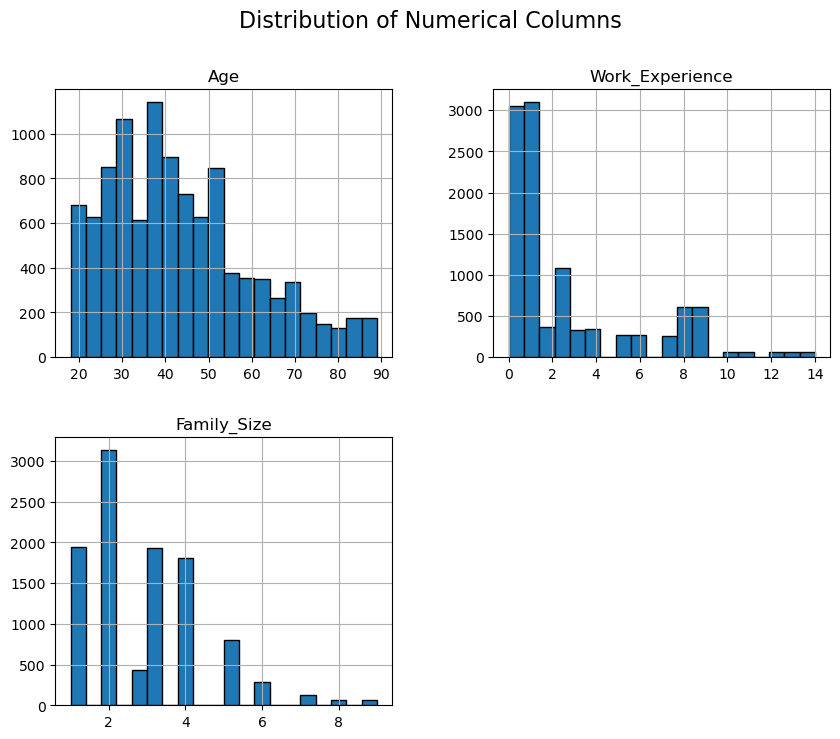

In [14]:
# Plotting numerical columns
numerical_columns = df.select_dtypes(include=['int64', 'float64']).columns
df[numerical_columns].hist(figsize=(10, 8), bins=20, edgecolor='black')
plt.suptitle('Distribution of Numerical Columns', fontsize=16)
plt.show()

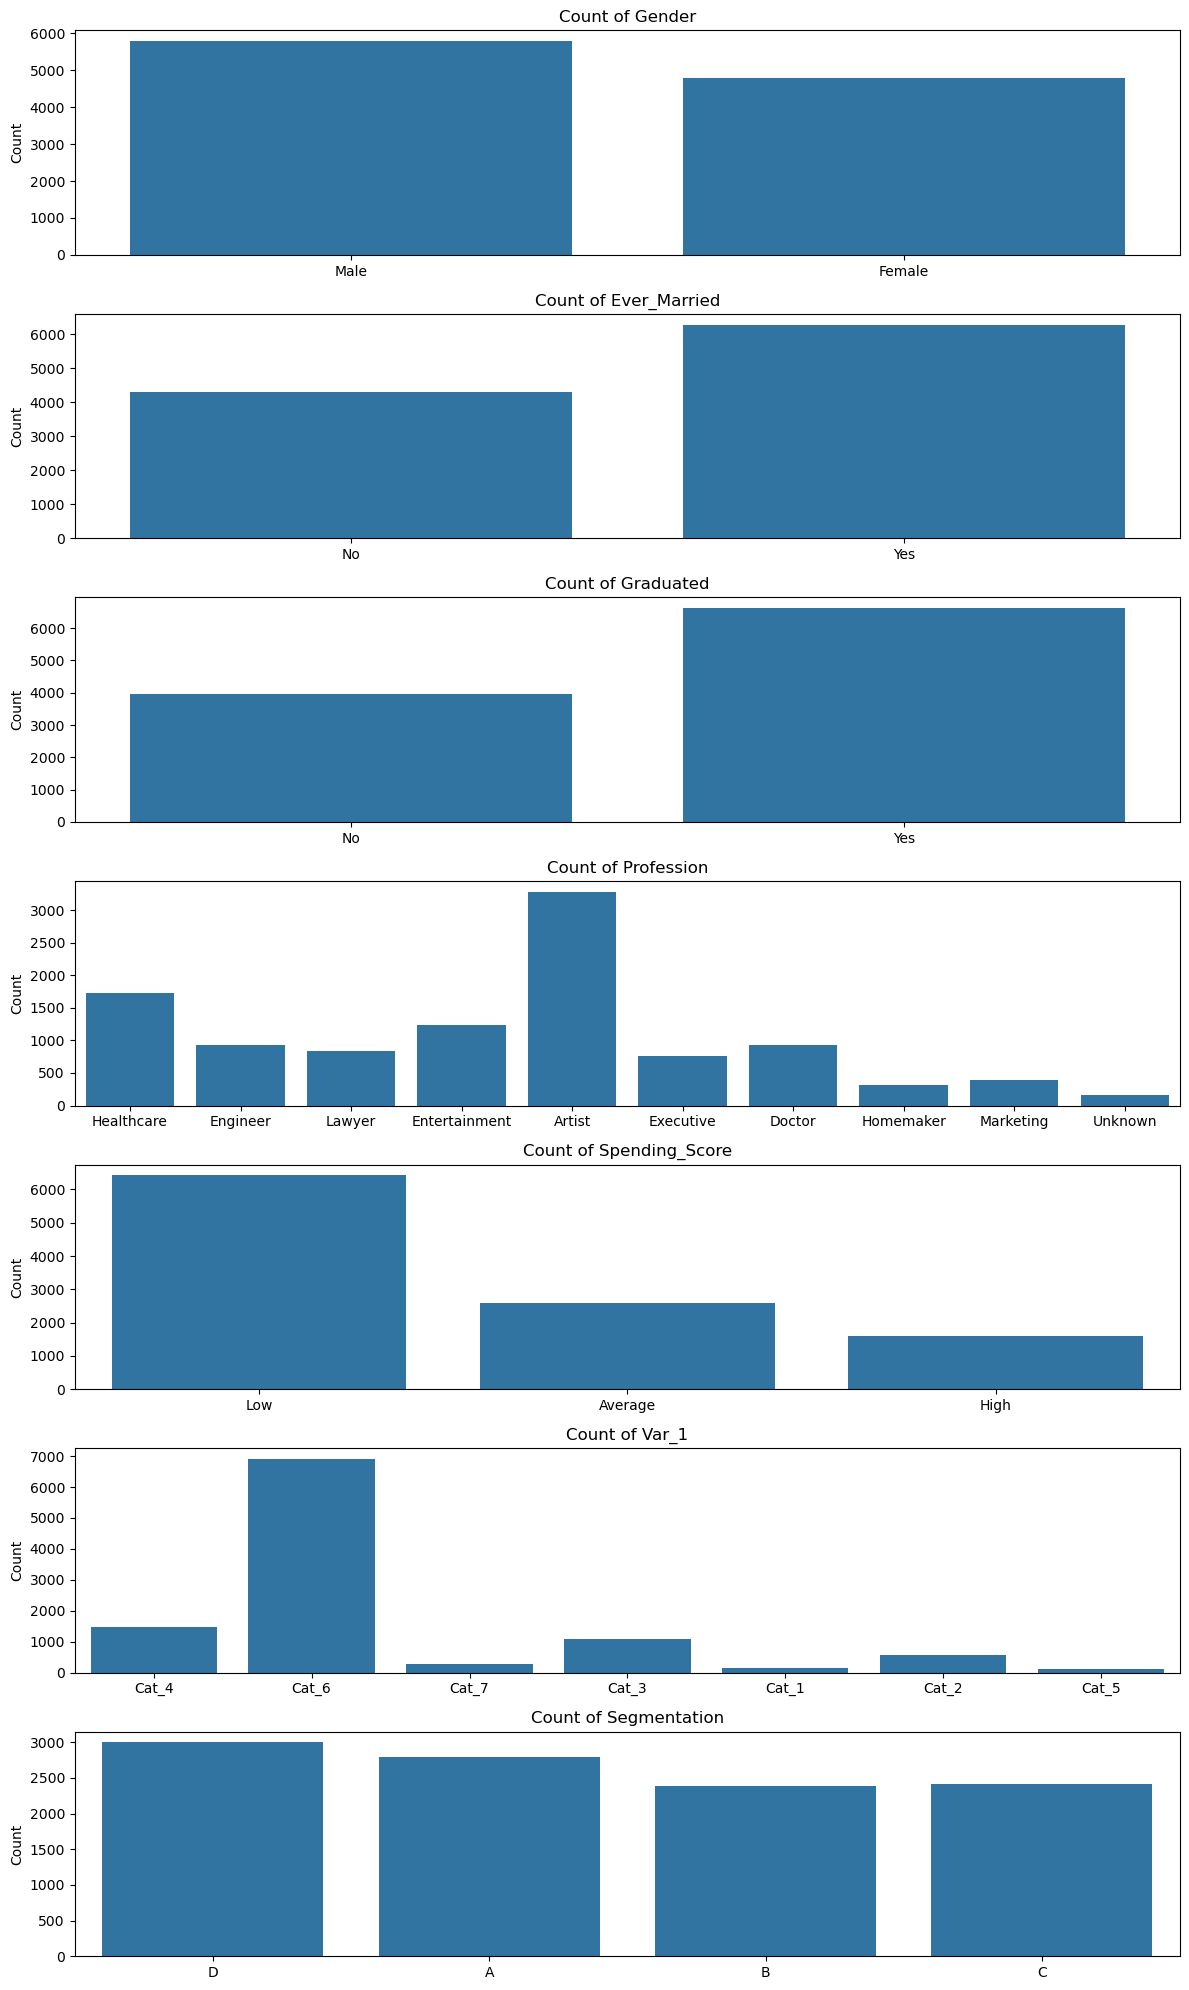

In [14]:
# Plotting categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns

# Plotting each categorical column
fig, axes = plt.subplots(nrows=len(categorical_columns), ncols=1, figsize=(12, 20))
for ax, column in zip(axes, categorical_columns):
    sns.countplot(data=df, x=column, ax=ax)
    ax.set_title(f'Count of {column}')
    ax.set_xlabel('')
    ax.set_ylabel('Count')

plt.tight_layout()
plt.show()

In [10]:
from sklearn.preprocessing import StandardScaler, LabelEncoder

In [12]:
# Perform feature scaling on numerical columns
scaler = StandardScaler()
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

In [14]:
# Initialize the LabelEncoder
label_encoder = LabelEncoder()

In [16]:
# Encode categorical columns
for column in df.select_dtypes(include=['object']).columns:
    df[column] = label_encoder.fit_transform(df[column])

In [18]:
df.head()

,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,1,0,-1.280582,0,5,-0.508916,2,0.764398,3,3
1,0,1,-0.323531,1,2,-0.000284,0,0.099283,3,0
2,0,1,1.411125,1,2,-0.508916,2,-1.230946,5,1
3,1,1,1.411125,1,7,-0.819659,1,-0.565831,5,1
4,0,1,-0.203899,1,3,-0.000284,1,2.094627,5,0


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

In [22]:
# Define features and target variable
X = df.drop(columns=['Segmentation'])  
y = df['Segmentation']

In [28]:
# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [30]:
# Train a Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [32]:
# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [34]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.4801
Precision: 0.4751
Recall: 0.4801
F1-score: 0.4767


In [44]:
from sklearn.model_selection import GridSearchCV

In [38]:
# Define the parameter grid for hyperparameter tuning
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [40]:
# Initialize the Random Forest Classifier
rf_classifier = RandomForestClassifier(random_state=42)

In [46]:
# Set up the GridSearchCV
grid_search = GridSearchCV(estimator=rf_classifier, param_grid=param_grid, cv=3, n_jobs=-1, verbose=2)

In [48]:
# Fit the model using GridSearchCV
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 216 candidates, totalling 648 fits


GridSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'bootstrap': [True, False],
                         'max_depth': [None, 10, 20, 30],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=2)

In [50]:
# Best parameters from Grid Search
best_params = grid_search.best_params_
print(f'Best Parameters: {best_params}')

Best Parameters: {'bootstrap': True, 'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 200}


In [52]:
# Predict on the test set using the best model
y_pred = grid_search.best_estimator_.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

In [54]:
# Display the evaluation metrics
print(f'Accuracy: {accuracy:.4f}')
print(f'Precision: {precision:.4f}')
print(f'Recall: {recall:.4f}')
print(f'F1-score: {f1:.4f}')

Accuracy: 0.5352
Precision: 0.5301
Recall: 0.5352
F1-score: 0.5302


In [56]:
from sklearn.metrics import confusion_matrix

In [60]:
# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)

print("Confustion Matrix after tuning",conf_matrix)


Confustion Matrix after tuning [[285 117  63 144]
 [155 199 143  75]
 [ 75 113 345  81]
 [142  35  12 501]]


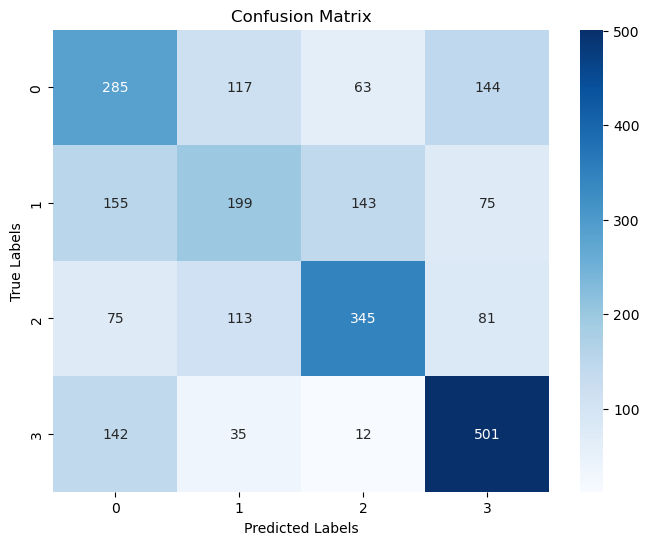

In [62]:
# Display the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [72]:
from sklearn.model_selection import KFold, cross_val_score

In [78]:
# Define k values to evaluate, k= 5 and k=10
k_values = [5, 10]

# Dictionary to store evaluation results
evaluation_results = {}

In [80]:
# Loop over each k value
for k in k_values:
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    
    # Perform cross-validation and evaluate the results
    cv_accuracy = cross_val_score(rf_classifier, X, y, cv=kf, scoring='accuracy')
    cv_precision = cross_val_score(rf_classifier, X, y, cv=kf, scoring='precision_weighted')
    cv_recall = cross_val_score(rf_classifier, X, y, cv=kf, scoring='recall_weighted')
    cv_f1 = cross_val_score(rf_classifier, X, y, cv=kf, scoring='f1_weighted')
    
    # Store the evaluation metrics for the current k value
    evaluation_results[k] = {
        'Accuracy': (cv_accuracy.mean(), cv_accuracy.std()),
        'Precision': (cv_precision.mean(), cv_precision.std()),
        'Recall': (cv_recall.mean(), cv_recall.std()),
        'F1-score': (cv_f1.mean(), cv_f1.std())
    }

In [82]:
# Display the evaluation results
for k, metrics in evaluation_results.items():
    print(f"\nEvaluation Metrics for k={k}:")
    for metric, values in metrics.items():
        mean, std = values
        print(f'{metric}: {mean:.4f} ± {std:.4f}')


Evaluation Metrics for k=5:
Accuracy: 0.4833 ± 0.0098
Precision: 0.4778 ± 0.0085
Recall: 0.4833 ± 0.0098
F1-score: 0.4798 ± 0.0090

Evaluation Metrics for k=10:
Accuracy: 0.4865 ± 0.0170
Precision: 0.4828 ± 0.0173
Recall: 0.4865 ± 0.0170
F1-score: 0.4833 ± 0.0169


In [86]:
# Perform feature importance
rf_classifier.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [88]:
# Get feature importances
importances = rf_classifier.feature_importances_

# Create a DataFrame
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

In [90]:
# Create a DataFrame for visualization
feature_importances = pd.DataFrame({'Feature': X.columns, 'Importance': importances})

# Sort the features by importance
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

# Select the top 10 most important features
top_10_features = feature_importances.head(10)

C:\Users\hxiuf\AppData\Local\Temp\ipykernel_14532\3417957381.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')


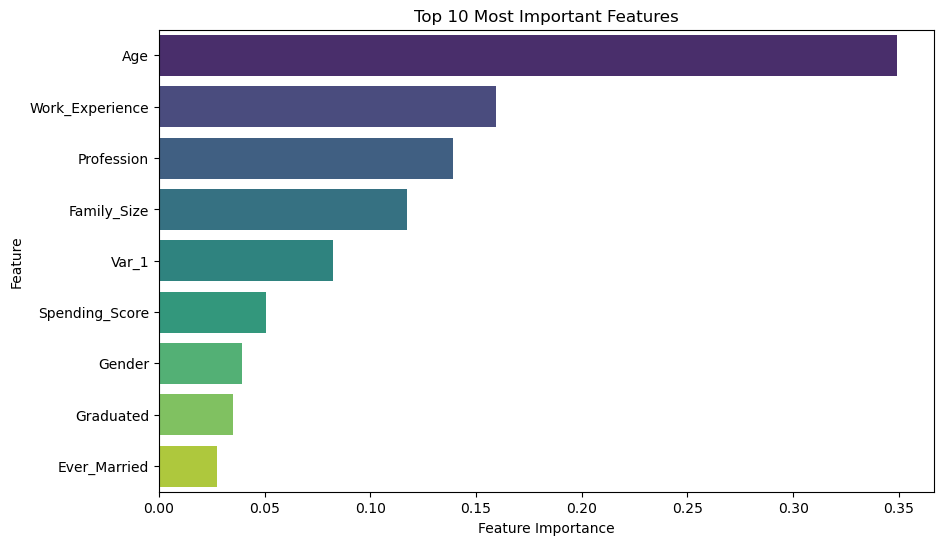

In [92]:
# Visualize the top 10 most important features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=top_10_features, palette='viridis')
plt.title('Top 10 Most Important Features')
plt.xlabel('Feature Importance')
plt.ylabel('Feature')
plt.show()

In [ ]:
###BELOW is coded on 16 Aug

In [22]:
from scipy.stats import zscore

In [24]:
# Apply Z-score normalization to the dataset (excluding categorical variables)
df_numeric = df.select_dtypes(include=['float64', 'int64'])
df_normalized = df_numeric.apply(zscore)

In [26]:
# Combine the normalized numeric data with the categorical data
df_categorical = df.select_dtypes(exclude=['float64', 'int64'])
df_normalized_final = pd.concat([df_normalized, df_categorical.reset_index(drop=True)], axis=1)

In [28]:
# Display the first few rows of the normalized dataframe
df_normalized_final.head()

,Age,Work_Experience,Family_Size,Gender,Ever_Married,Graduated,Profession,Spending_Score,Var_1,Segmentation
0,-1.283130,-0.503740,0.767219,Male,No,No,Healthcare,Low,Cat_4,D
1,-0.328530,0.000639,0.103336,Female,Yes,Yes,Engineer,Average,Cat_4,A
2,1.401683,-0.503740,-1.224430,Female,Yes,Yes,Engineer,Low,Cat_6,B
3,1.401683,-0.815128,-0.560547,Male,Yes,Yes,Lawyer,High,Cat_6,B
4,-0.209205,0.000639,2.094985,Female,Yes,Yes,Entertainment,High,Cat_6,A


In [30]:
# Encode categorical variables using one-hot encoding for nominal variables and label encoding for ordinal variables

# One-hot encoding for nominal variables
df_encoded = pd.get_dummies(df_normalized_final, columns=['Gender', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation'])

# Since 'Ever_Married' and 'Graduated' can be seen as ordinal variables (Yes/No), we'll use label encoding for them
from sklearn.preprocessing import LabelEncoder

label_encoder = LabelEncoder()
df_encoded['Ever_Married'] = label_encoder.fit_transform(df_encoded['Ever_Married'])
df_encoded['Graduated'] = label_encoder.fit_transform(df_encoded['Graduated'])

# Display the first few rows of the encoded dataframe
df_encoded.head()


,Age,Work_Experience,Family_Size,Ever_Married,Graduated,Gender_Female,Gender_Male,Profession_Artist,Profession_Doctor,Profession_Engineer,...,Var_1_Cat_2,Var_1_Cat_3,Var_1_Cat_4,Var_1_Cat_5,Var_1_Cat_6,Var_1_Cat_7,Segmentation_A,Segmentation_B,Segmentation_C,Segmentation_D
0,-1.283130,-0.503740,0.767219,0,0,False,True,False,False,False,...,False,False,True,False,False,False,False,False,False,True
1,-0.328530,0.000639,0.103336,1,1,True,False,False,False,True,...,False,False,True,False,False,False,True,False,False,False
2,1.401683,-0.503740,-1.224430,1,1,True,False,False,False,True,...,False,False,False,False,True,False,False,True,False,False
3,1.401683,-0.815128,-0.560547,1,1,False,True,False,False,False,...,False,False,False,False,True,False,False,True,False,False
4,-0.209205,0.000639,2.094985,1,1,True,False,False,False,False,...,False,False,False,False,True,False,True,False,False,False


In [32]:
from sklearn.model_selection import train_test_split

# Define the features (X) and the target variable (y)
X = df_encoded.drop(columns=['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D'])
y = df_encoded[['Segmentation_A', 'Segmentation_B', 'Segmentation_C', 'Segmentation_D']]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shapes of the resulting datasets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8469, 27), (2118, 27), (8469, 4), (2118, 4))

In [34]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.preprocessing import LabelEncoder

In [36]:
# Initial Random Forest model and fit the traing and testing sets
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Get feature importances
feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': rf_model.feature_importances_
}).sort_values(by='Importance', ascending=False)

feature_importances.head(15)  # Display the top 15 features by importance

,Feature,Importance
0,Age,0.383867
1,Work_Experience,0.174582
2,Family_Size,0.123163
4,Graduated,0.031435
3,Ever_Married,0.024545
7,Profession_Artist,0.024122
12,Profession_Healthcare,0.023348
19,Spending_Score_Low,0.020458
25,Var_1_Cat_6,0.020263
6,Gender_Male,0.016395


In [98]:
# Selecting the top features based on importance
selected_features = ['Age', 'Work_Experience', 'Family_Size', 'Profession_Artist', 
                     'Profession_Healthcare', 'Graduated']

X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [100]:
# Define a parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [102]:
# Initialize a Random Forest classifier
rf_tuned = RandomForestClassifier(random_state=42)

In [88]:
from sklearn.model_selection import GridSearchCV

In [104]:
# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_tuned, param_grid=param_grid, 
                           cv=3, n_jobs=-1, verbose=2, scoring='accuracy')

In [106]:
# Fit GridSearchCV to the training data
grid_search.fit(X_train_selected, y_train)

# Best parameters found by GridSearchCV
best_params = grid_search.best_params_

# Evaluate the tuned model on the test set
best_rf_model = grid_search.best_estimator_
y_test_pred = best_rf_model.predict(X_test_selected)

Fitting 3 folds for each of 162 candidates, totalling 486 fits


In [108]:
# Calculate evaluation metrics
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

accuracy = accuracy_score(y_test, y_test_pred)
precision = precision_score(y_test, y_test_pred, average='weighted')
recall = recall_score(y_test, y_test_pred, average='weighted')
f1 = f1_score(y_test, y_test_pred, average='weighted')

In [110]:
best_params, accuracy, precision, recall, f1

({'bootstrap': False,
  'max_depth': 15,
  'min_samples_leaf': 1,
  'min_samples_split': 2,
  'n_estimators': 200},
 0.2842304060434372,
 0.42642719236269067,
 0.2842304060434372,
 0.33789919629525206)

In [44]:
# Compute metrics for training data
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='macro')
train_recall = recall_score(y_train, y_train_pred, average='macro')
train_f1 = f1_score(y_train, y_train_pred, average='macro')

In [56]:
print(f"Accuracy of the RFC training: {train_accuracy}")
print(f"Precision of the RFC training: {train_precision}")
print(f"Recall of the RFC training: {train_recall}")
print(f"F1-score of the RFC training: {train_f1}")

Accuracy of the RFC training: 0.9226591096941787
Precision of the RFC training: 0.9610084310634535
Recall of the RFC training: 0.9210267722235833
F1-score of the RFC training: 0.9405055198271862


In [40]:
# Predict on both training and test sets
y_train_pred = rf_model.predict(X_train)
y_test_pred = rf_model.predict(X_test)

In [42]:
# Perform Randomized Search for hyperparameter tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

In [54]:
# Compute metrics for test data
test_accuracy = accuracy_score(y_test, y_test_pred)
test_precision = precision_score(y_test, y_test_pred, average='macro')
test_recall = recall_score(y_test, y_test_pred, average='macro')
test_f1 = f1_score(y_test, y_test_pred, average='macro')

In [58]:
print(f"Accuracy of the RFC testing: {test_accuracy}")
print(f"Precision of the RFC testing: {test_precision}")
print(f"Recall of the RFC testing: {test_recall}")
print(f"F1-score of the RFC testing: {test_f1}")

Accuracy of the RFC testing: 0.31067044381491976
Precision of the RFC testing: 0.4365727333026018
Recall of the RFC testing: 0.3066536717203825
F1-score of the RFC testing: 0.35972883299496206


In [60]:
# Display the confusion matrix for the test set
conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred.argmax(axis=1))
print("Confusion Matrix Before Tuning:")
print(conf_matrix)

Confusion Matrix Before Tuning:
[[326  95  71  73]
 [258  98  75  52]
 [185  72 169  52]
 [253  36  32 271]]


In [62]:
# Perform Randomized Search for hyperparameter tuning
param_distributions = {
    'n_estimators': [100, 200, 300, 400, 500],
    'max_features': ['sqrt', 'log2', None],
    'max_depth': [10, 20, 30, 40, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1)

random_search.fit(X_train, y_train)

Fitting 3 folds for each of 50 candidates, totalling 150 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(random_state=42),
                   n_iter=50, n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 40, None],
                                        'max_features': ['sqrt', 'log2', None],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500]},
                   random_state=42, verbose=1)

In [64]:
# Get the best model
best_rf_model = random_search.best_estimator_

# Predict on the test set with the optimized model
y_test_pred_optimized = best_rf_model.predict(X_test)

# Compute metrics for the optimized model
opt_test_accuracy = accuracy_score(y_test, y_test_pred_optimized)
opt_test_precision = precision_score(y_test, y_test_pred_optimized, average='macro')
opt_test_recall = recall_score(y_test, y_test_pred_optimized, average='macro')
opt_test_f1 = f1_score(y_test, y_test_pred_optimized, average='macro')

# Plot comparison between initial and optimized test metrics
initial_metrics = [test_accuracy, test_precision, test_recall, test_f1]
optimized_metrics = [opt_test_accuracy, opt_test_precision, opt_test_recall, opt_test_f1]

print(initial_metrics)
print(optimized_metrics)



[0.31067044381491976, 0.4365727333026018, 0.3066536717203825, 0.35972883299496206]
[0.3574126534466478, 0.3727214115898577, 0.3525237045306369, 0.3622406545905502]


In [ ]:
plt.figure(figsize=(10, 5))
plt.bar(metrics, initial_metrics, alpha=0.6, label='Before Optimization')
plt.bar(metrics, optimized_metrics, alpha=0.6, label='After Optimization')
plt.title('Model Performance Comparison')
plt.xlabel('Metrics')
plt.ylabel('Score')
plt.legend()
plt.show()

In [66]:
# Display the confusion matrix for the optimized model
opt_conf_matrix = confusion_matrix(y_test.values.argmax(axis=1), y_test_pred_optimized.argmax(axis=1))
print("Confusion Matrix After Tuning:")
print(opt_conf_matrix)

Confusion Matrix After Tuning:
[[196 136 102 131]
 [150 133 109  91]
 [134 103 166  75]
 [156  74  75 287]]


In [ ]:
## TRy SVM

In [70]:
from sklearn.svm import SVC

In [72]:
svm_clf = SVC(probability=True, random_state=42)

In [74]:
# Fit the SVM model
svm_clf.fit(X_train, y_train)

ValueError: y should be a 1d array, got an array of shape (8469, 4) instead.

In [ ]:
## End of SVM

In [44]:
# Predict on the test set
y_pred = best_rf_model.predict(X_test)

NameError: name 'best_rf_model' is not defined

In [42]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='macro')
recall = recall_score(y_test, y_pred, average='macro')
f1 = f1_score(y_test, y_pred, average='macro')

NameError: name 'y_pred' is not defined

In [ ]:
random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_distributions,
                                   n_iter=50, cv=3, verbose=1, random_state=42, n_jobs=-1)

In [ ]:
################ OLD CODES#############

In [90]:
# Initialize models
log_reg = LogisticRegression(max_iter=1000)
rf_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

In [94]:
# Fit the models
log_reg.fit(X_train, y_train)
rf_clf.fit(X_train, y_train)
svm_clf.fit(X_train, y_train)

SVC(probability=True, random_state=42)

In [95]:
# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_svm_clf = svm_clf.predict(X_test)

In [96]:
# Predict on test set
y_pred_log_reg = log_reg.predict(X_test)
y_pred_rf_clf = rf_clf.predict(X_test)
y_pred_svm_clf = svm_clf.predict(X_test)

In [97]:
# Calculate metrics
metrics = {
    'Accuracy': [accuracy_score(y_test, y_pred_log_reg),
                 accuracy_score(y_test, y_pred_rf_clf),
                 accuracy_score(y_test, y_pred_svm_clf)],
    
    'Precision': [precision_score(y_test, y_pred_log_reg),
                  precision_score(y_test, y_pred_rf_clf),
                  precision_score(y_test, y_pred_svm_clf)],
    
    'Recall': [recall_score(y_test, y_pred_log_reg),
               recall_score(y_test, y_pred_rf_clf),
               recall_score(y_test, y_pred_svm_clf)],
    
    'F1-Score': [f1_score(y_test, y_pred_log_reg),
                 f1_score(y_test, y_pred_rf_clf),
                 f1_score(y_test, y_pred_svm_clf)]
}

In [108]:
# Convert the metrics into a DataFrame for better comparison
metrics_df = pd.DataFrame(metrics, index=['Logistic Regression', 'Random Forest', 'SVM'])

# Print the DataFrame
print(metrics_df)

                     Accuracy  Precision    Recall  F1-Score
Logistic Regression  0.765817   0.000000  0.000000  0.000000
Random Forest        0.724268   0.323607  0.164199  0.217857
SVM                  0.767076   0.800000  0.005384  0.010695


In [102]:
# Compute ROC Curve and AUC for each model
y_prob_log_reg = log_reg.predict_proba(X_test)[:, 1]
y_prob_rf_clf = rf_clf.predict_proba(X_test)[:, 1]
y_prob_svm_clf = svm_clf.predict_proba(X_test)[:, 1]

fpr_log_reg, tpr_log_reg, _ = roc_curve(y_test, y_prob_log_reg)
fpr_rf_clf, tpr_rf_clf, _ = roc_curve(y_test, y_prob_rf_clf)
fpr_svm_clf, tpr_svm_clf, _ = roc_curve(y_test, y_prob_svm_clf)

roc_auc_log_reg = roc_auc_score(y_test, y_prob_log_reg)
roc_auc_rf_clf = roc_auc_score(y_test, y_prob_rf_clf)
roc_auc_svm_clf = roc_auc_score(y_test, y_prob_svm_clf)

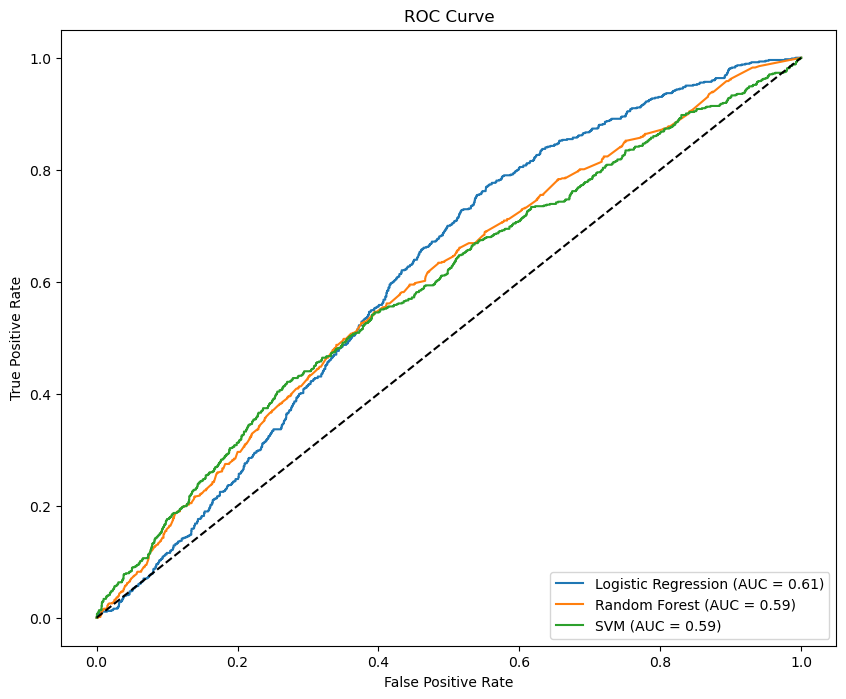

In [104]:
# Plot ROC Curve
plt.figure(figsize=(10, 8))
plt.plot(fpr_log_reg, tpr_log_reg, label=f'Logistic Regression (AUC = {roc_auc_log_reg:.2f})')
plt.plot(fpr_rf_clf, tpr_rf_clf, label=f'Random Forest (AUC = {roc_auc_rf_clf:.2f})')
plt.plot(fpr_svm_clf, tpr_svm_clf, label=f'SVM (AUC = {roc_auc_svm_clf:.2f})')
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.show()

In [110]:
from sklearn.model_selection import RandomizedSearchCV

In [116]:
# Define the parameter grid for Logistic Regression
param_grid = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': [0.01, 0.1, 1, 10, 100],
    'solver': ['lbfgs', 'liblinear', 'saga'],
    'max_iter': [100, 200, 500]
}


In [118]:
# Initialize the Logistic Regression model
log_reg = LogisticRegression(random_state=42)

In [120]:
# Initialize the RandomizedSearchCV
random_search = RandomizedSearchCV(estimator=log_reg, param_distributions=param_grid, 
                                   n_iter=10, cv=3, verbose=1, random_state=42, n_jobs=-1)

In [122]:
# Fit the model to find the best parameters
random_search.fit(X_train, y_train)

# Get the best model from the search
best_log_reg = random_search.best_estimator_

# Predict on test set using the best model
y_pred_best_log_reg = best_log_reg.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py:547: FitFailedWarning: 
21 fits failed out of a total of 30.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\model_selection\_validation.py", line 895, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\base.py", line 1474, in wrapper
    return fit_method(estimator, *args, **kwargs)
           ^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py", line 1172, in fit
    solver = _c

In [124]:
# Calculate metrics for the tuned Logistic Regression model
tuned_metrics = {
    'Accuracy': accuracy_score(y_test, y_pred_best_log_reg),
    'Precision': precision_score(y_test, y_pred_best_log_reg),
    'Recall': recall_score(y_test, y_pred_best_log_reg),
    'F1-Score': f1_score(y_test, y_pred_best_log_reg)
}

C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


In [126]:
# Convert tuned metrics to DataFrame for comparison
tuned_metrics_df = pd.DataFrame([tuned_metrics], index=['Tuned Logistic Regression'])

# Original Logistic Regression metrics (placeholders)
original_metrics = {
    'Accuracy': [0.765817],
    'Precision': [0.0],
    'Recall': [0.0],
    'F1-Score': [0.0]
}

In [128]:
# Convert original metrics to DataFrame
metrics_df = pd.DataFrame(original_metrics, index=['Logistic Regression'])

# Compare the tuned model's metrics with the original Logistic Regression metrics
comparison_df = pd.concat([metrics_df, tuned_metrics_df])

# Display the comparison DataFrame
print(comparison_df)

                           Accuracy  Precision  Recall  F1-Score
Logistic Regression        0.765817        0.0     0.0       0.0
Tuned Logistic Regression  0.766132        0.0     0.0       0.0


In [130]:
# Initialize and fit the Logistic Regression model
log_reg = LogisticRegression(max_iter=1000, random_state=42)
log_reg.fit(X_train, y_train)

# Predict on the test set
y_pred = log_reg.predict(X_test)

In [134]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [136]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

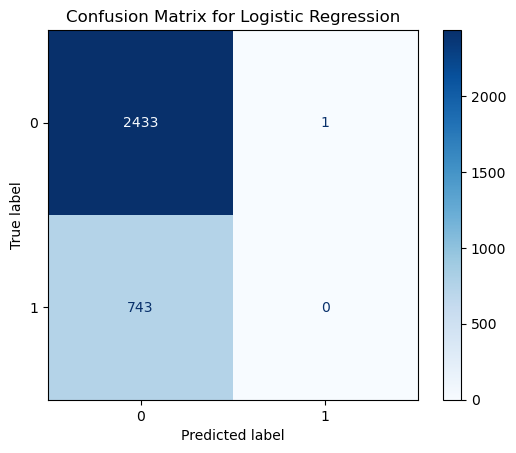

In [138]:
# Display the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [140]:
# Print out the confusion matrix
print(f'Confusion Matrix:\n{cm}')

Confusion Matrix:
[[2433    1]
 [ 743    0]]


In [142]:
# Optional: Analyze the confusion matrix
# True Positives (TP), False Positives (FP), True Negatives (TN), False Negatives (FN)
TP = cm[1, 1]
FP = cm[0, 1]
TN = cm[0, 0]
FN = cm[1, 0]

print(f'True Positives (TP): {TP}')
print(f'False Positives (FP): {FP}')
print(f'True Negatives (TN): {TN}')
print(f'False Negatives (FN): {FN}')

True Positives (TP): 0
False Positives (FP): 1
True Negatives (TN): 2433
False Negatives (FN): 743


In [150]:
from sklearn.model_selection import KFold, StratifiedKFold, cross_val_score
from sklearn.metrics import make_scorer

In [146]:
# Define the stratified K-fold cross-validator
kf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

In [152]:
# Define the scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score),
    'recall': make_scorer(recall_score),
    'f1': make_scorer(f1_score)
}

In [154]:
# Perform cross-validation
cv_results = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')

In [156]:
# Calculate cross-validated scores for all metrics
accuracy_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='accuracy')
precision_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='precision')
recall_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='recall')
f1_scores = cross_val_score(log_reg, X, y, cv=kf, scoring='f1')

C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\hxiuf\anaconda3\Lib\site-packages\sklearn\metrics\_clas

In [158]:
# Print the results
print(f'Accuracy Scores: {accuracy_scores}')
print(f'Precision Scores: {precision_scores}')
print(f'Recall Scores: {recall_scores}')
print(f'F1 Scores: {f1_scores}')

Accuracy Scores: [0.77431539 0.77431539 0.77468115 0.77420879 0.77326405]
Precision Scores: [0. 0. 0. 0. 0.]
Recall Scores: [0. 0. 0. 0. 0.]
F1 Scores: [0. 0. 0. 0. 0.]


In [160]:
# Calculate and print the mean and standard deviation of each metric
print(f'Mean Accuracy: {accuracy_scores.mean():.4f} ± {accuracy_scores.std():.4f}')
print(f'Mean Precision: {precision_scores.mean():.4f} ± {precision_scores.std():.4f}')
print(f'Mean Recall: {recall_scores.mean():.4f} ± {recall_scores.std():.4f}')
print(f'Mean F1-Score: {f1_scores.mean():.4f} ± {f1_scores.std():.4f}')

Mean Accuracy: 0.7742 ± 0.0005
Mean Precision: 0.0000 ± 0.0000
Mean Recall: 0.0000 ± 0.0000
Mean F1-Score: 0.0000 ± 0.0000
